Student ID: 2408216

In [338]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import os
import numpy as np
import sys
import patsy
import math
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer import stargazer
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from statsmodels.tools.eval_measures import mse,rmse
import ast
!pip install xgboost

In [339]:
path1 = os.path.join('listings_LA_Q3.csv')
path2 = os.path.join('listings_LA_Q4.csv')
path3 = os.path.join('listings_SF_Q3.csv')

In [340]:
df_LAQ3_start = pd.read_csv(path1, quotechar='"', on_bad_lines="skip")
df_LAQ4_start = pd.read_csv(path2, quotechar='"', on_bad_lines="skip")
df_SFQ3_start = pd.read_csv(path3, quotechar='"', on_bad_lines="skip")

In [341]:
pd.set_option('display.max_columns', None)  # Show all columns
df_LAQ3_start.head(10)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,670339032744709144,https://www.airbnb.com/rooms/670339032744709144,20240904164210,2024-09-05,city scrape,Westwood lovely three bedrooms three bathrooms,The whole group will enjoy easy access to ever...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,4780152,https://www.airbnb.com/users/show/4780152,Moon,2013-01-20,"Los Angeles, CA",I am from LA\r\nI love studying. I care about ...,within a few hours,96%,41%,f,https://a0.muscache.com/im/users/4780152/profi...,https://a0.muscache.com/im/users/4780152/profi...,Brentwood,173.0,194.0,"['email', 'phone']",t,t,NaN,West Los Angeles,City of Los Angeles,34.049660,-118.435550,Entire condo,Entire home/apt,6,3.0,3 baths,3.0,3.0,"[""Dedicated workspace"", ""Air conditioning"", ""K...",$399.00,30,365,30.0,30.0,365.0,365.0,30.0,365.0,NaN,t,30,60,90,365,2024-09-05,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,61,4,57,0,NaN
1,37014494,https://www.airbnb.com/rooms/37014494,20240904164210,2024-09-05,previous scrape,Spanish style lower duplex near Beverly Hills,NaN,NaN,https://a0.muscache.com/pictures/65db39d1-c503...,278288178,https://www.airbnb.com/users/show/278288178,Ida,2019-07-22,NaN,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/8e454...,https://a0.muscache.com/im/pictures/user/8e454...,South Robertson,1.0,1.0,"['email', 'phone']",t,f,NaN,Beverlywood,City of Los Angeles,34.048410,-118.387510,Entire rental unit,Entire home/apt,2,NaN,2 baths,2.0,NaN,"[""Air conditioning"", ""Pets allowed"", ""Hot wate...",NaN,30,270,30.0,30.0,270.0,270.0,30.0,270.0,NaN,NaN,0,0,0,0,2024-09-05,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,1024835174766068422,https://www.airbnb.com/rooms/1024835174766068422,20240904164210,2024-09-05,city scrape,Charming Beverly Hills Home,"Charming, renovated home in the Beverly Hills ...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,513813179,https://www.airbnb.com/users/show/513813179,Tiana,2023-05-08,NaN,NaN,within a day,60%,17%,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,NaN,4.0,5.0,"['email', 'phone']",f,t,NaN,Beverly Hills,Other Cities,34.070583,-118.390742,Entire home,Entire home/apt,6,3.0,3 baths,3.0,3.0,"[""Air conditioning"", ""Kitchen"", ""Carbon monoxi...",$434.00,30,365,30.0,30.0,365.0,365.0,30.0,365.0,NaN,t,27,57,87,267,2024-09-05,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,4,4,0,0,NaN
3,850744632375448560,https://www.airbnb.com/rooms/850744632375448560,20240904164210,2024-09-04,city scrape,Tianpu's warm room with bathroom,Relax in this unique and serene retreat.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,432956623,https://www.airbnb.com/users/show

In [342]:
pd.get_option('display.max_columns')

In [343]:
df_LAQ3_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45533 entries, 0 to 45532
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            45533 non-null  int64  
 1   listing_url                                   45533 non-null  object 
 2   scrape_id                                     45533 non-null  int64  
 3   last_scraped                                  45533 non-null  object 
 4   source                                        45533 non-null  object 
 5   name                                          45532 non-null  object 
 6   description                                   44100 non-null  object 
 7   neighborhood_overview                         23112 non-null  object 
 8   picture_url                                   45533 non-null  object 
 9   host_id                                       45533 non-null 

**First we'll take a look at the missing values so we can start our data cleaning**

In [345]:
df_LAQ3_missing = df_LAQ3_start.isna().sum()

In [346]:
df_LAQ3_missing[df_LAQ3_missing>0].sort_values(ascending = False)

calendar_updated               45533
license                        32730
neighborhood_overview          22421
neighbourhood                  22420
host_about                     20891
review_scores_value            12165
review_scores_location         12164
review_scores_checkin          12163
review_scores_cleanliness      12156
review_scores_communication    12156
review_scores_accuracy         12155
first_review                   12146
last_review                    12146
review_scores_rating           12146
reviews_per_month              12146
host_location                  10860
host_response_rate             10088
host_response_time             10088
host_neighbourhood              9985
host_acceptance_rate            9683
beds                            8334
bathrooms                       8239
price                           8237
has_availability                3339
bedrooms                        3039
description                     1433
host_is_superhost               1252
b

**This code below includes all columns that are irrelevant for my models and therefore are being excluded. This includes first of all, columns that are not that important but have a high number of missing observations. Second, it includes also columns that are difficult to turn into a usable predictor, like web URL's, ID-numbers, or descriptions. Third, it also includes dates that are not relevant for my model.**

In [477]:
df_LAQ3 = df_LAQ3_start.copy()

In [478]:
df_LAQ3=df_LAQ3.drop(["calendar_updated", "license", "neighborhood_overview", "neighbourhood", "host_about", "host_location", "first_review", "last_review", "host_neighbourhood", "host_since", "bathrooms_text", "description", "listing_url", "source",
                      "scrape_id", "last_scraped", "host_id", "host_url", "host_thumbnail_url", "host_picture_url", "calendar_last_scraped", "picture_url", "host_name", "host_verifications", "host_has_profile_pic", "name", "neighbourhood_group_cleansed"],axis=1)

**First we have to turn price from an object into a float. Since price is our target variable we will drop the listings where price is missing. We also look at the distribution of prices in our dataset, so we can exclude extreme outliers**

In [480]:
# Remove currency symbols and commas, then convert to float
df_LAQ3['price'] = df_LAQ3['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [481]:
df_LAQ3.dropna(subset=['price'], inplace = True)

In [482]:
df_LAQ3.price.quantile([0.5, 0.75, 0.8, 0.9, 0.95, 0.99, 0.995]).map('{:,.2f}'.format)

0.500      155.00
0.750      260.00
0.800      300.00
0.900      499.00
0.950      868.00
0.990    2,500.00
0.995    4,000.00
Name: price, dtype: object

**We will exclude the highest 1 percentile priced listings to make sure extreme values won't affect the prediction model.**

In [485]:
df_LAQ3=df_LAQ3[df_LAQ3.price<2500]

In [486]:
df_LAQ3_missing2 = df_LAQ3.isna().sum()

In [487]:
df_LAQ3_missing2[df_LAQ3_missing2>0].sort_values(ascending = False)

review_scores_location         8925
review_scores_value            8925
review_scores_checkin          8924
review_scores_cleanliness      8922
review_scores_accuracy         8921
review_scores_communication    8920
review_scores_rating           8917
reviews_per_month              8917
host_response_time             4199
host_response_rate             4199
host_acceptance_rate           4114
host_is_superhost              1150
has_availability                399
bedrooms                        144
beds                            107
bathrooms                        12
dtype: int64

**We can see that several missing values have already been removed, simply by filtering our price data**

**The codes below will impute missing variables for reviews with the median, and create a flag for each review where an imputation was made**

*AI used for code below:*

In [493]:
for var in [
    "review_scores_value", 
    "review_scores_location", 
    "review_scores_checkin", 
    "review_scores_cleanliness", 
    "review_scores_accuracy", 
    "review_scores_communication",
    "review_scores_rating",
    "reviews_per_month"
]:
    df_LAQ3[f"flag_{var}"] = [int(x) for x in df_LAQ3[var].isna()]

*AI used for code below:*

In [496]:
for var in [
    "review_scores_value", 
    "review_scores_location", 
    "review_scores_checkin", 
    "review_scores_cleanliness", 
    "review_scores_accuracy", 
    "review_scores_communication",
    "review_scores_rating",
    "reviews_per_month"
]:
    df_LAQ3[var] = df_LAQ3[var].fillna(np.nanmedian(df_LAQ3[var]))

**For listings where bed is missing, I assume that most beds are double beds, therefore I divide accommodates by 2 to find the number of beds, same goes for bedrooms. The code also rounds the number of beds upwards if it is not an integer already.**

In [498]:
df_LAQ3['beds']=df_LAQ3['beds'].fillna(np.ceil(df_LAQ3['accommodates'] / 2))
df_LAQ3['bedrooms']=df_LAQ3['bedrooms'].fillna(np.ceil(df_LAQ3['accommodates'] / 2))
df_LAQ3['bathrooms']=df_LAQ3['bathrooms'].fillna(np.nanmedian(df_LAQ3['bathrooms']))

In [500]:
host_response_time_options = df_LAQ3['host_response_time'].unique()
host_response_time_options

array(['within a few hours', 'within a day', 'a few days or more',
       'within an hour', nan], dtype=object)

**We can see that there are 4 types of host response times, we will give them numbers in an ordinal ranking from slowest response to fastest. When this variable is missing I assume the host doesn't respond and a 0 value will be attached**

*AI used for code below:*

In [502]:
# Define ordinal mapping for response times
response_time_mapping = {
    "within an hour": 4,
    "within a few hours": 3,
    "within a day": 2,
    "a few days or more": 1
}

# Apply mapping
df_LAQ3["host_response_time"] = df_LAQ3["host_response_time"].map(response_time_mapping)

# Replace NaN (missing values) with 0 (indicating "no response")
df_LAQ3["host_response_time"].fillna(0, inplace=True)

**Here we will impute missing values regarding host data. For most missing values we assume a 0:**

*AI used for some code below:*

In [506]:
df_LAQ3['host_response_rate'] = df_LAQ3['host_response_rate'].str.rstrip('%').astype(float) / 100
df_LAQ3['host_acceptance_rate'] = df_LAQ3['host_acceptance_rate'].str.rstrip('%').astype(float) / 100
df_LAQ3['host_response_rate'] = df_LAQ3['host_response_rate'].fillna(0)
df_LAQ3['host_acceptance_rate'] = df_LAQ3['host_acceptance_rate'].fillna(0)
df_LAQ3['host_is_superhost'] = df_LAQ3['host_is_superhost'].map({'t': 1, 'f': 0})
df_LAQ3['host_is_superhost'] = df_LAQ3['host_is_superhost'].fillna(0).astype(int)
df_LAQ3['host_identity_verified'] = df_LAQ3['host_identity_verified'].map({'t': 1, 'f': 0})

**This code will impute missing values for 'has_availability', I do this based on information from 'availability_365'. If a listing has been available at least one day in the last 365 days, we will assume the listing is available:**

*AI used for code below:*

In [508]:
df_LAQ3['has_availability'] = df_LAQ3['has_availability'].map({'t': 1, 'f': 0})

df_LAQ3.loc[df_LAQ3['availability_365'] >= 1, 'has_availability'] = 1
df_LAQ3.loc[df_LAQ3['availability_365'] == 0, 'has_availability'] = 0

In [509]:
df_LAQ3_missing = df_LAQ3.isna().sum()

In [510]:
df_LAQ3_missing[df_LAQ3_missing>0].sort_values(ascending = False)

Series([], dtype: int64)

**All missing values have been removed or imputed now. Now we need to turn objects into numbers that can be used for the prediction models:**

In [518]:
unique_property_type = df_LAQ3['property_type'].unique()
unique_property_type

array(['Entire condo', 'Entire home', 'Private room in home',
       'Entire rental unit', 'Private room in rental unit',
       'Private room in bed and breakfast', 'Entire townhouse',
       'Shared room in serviced apartment', 'Shared room in rental unit',
       'Shared room in home', 'Entire bungalow', 'Entire guesthouse',
       'Entire cottage', 'Private room in townhouse',
       'Entire guest suite', 'Room in aparthotel', 'Room in hotel',
       'Camper/RV', 'Private room in villa', 'Private room in guesthouse',
       'Entire villa', 'Boat', 'Private room in condo', 'Castle',
       'Entire loft', 'Entire serviced apartment',
       'Shared room in hostel', 'Private room in bungalow',
       'Entire cabin', 'Tiny home', 'Private room in casa particular',
       'Private room in tiny home', 'Campsite', 'Private room in loft',
       'Room in boutique hotel', 'Private room in guest suite',
       'Shared room in villa', 'Shared room in bed and breakfast',
       'Entire place',

In [519]:
df_LAQ3.groupby(["room_type", "property_type"]).agg(
    mean_price=("price", np.mean), 
    count = ('price', 'size')
).style.format({'mean_price': '{:,.2f}', 'count': '{:,.0f}'})

**The above table shows that property_type is somewhat redudant and very similar to room_type, this would overcomplicate the model, therefore we will also drop that property_type from the model**

In [524]:
df_LAQ3=df_LAQ3.drop(["property_type"],axis=1)

**We will turn room_type into 4 dummies for each type of room, AI was used below:**

In [527]:
unique_room_type = df_LAQ3['room_type'].unique()
unique_room_type

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

**We will make the dummies usable for modeling now**

In [528]:
df_LAQ3 = pd.get_dummies(df_LAQ3, columns=['room_type'], prefix='room', dtype=int)
df_LAQ3.columns = df_LAQ3.columns.str.replace(" ", "_")
df_LAQ3.columns = df_LAQ3.columns.str.replace("/", "_")

In [530]:
unique_instant_bookable = df_LAQ3['instant_bookable'].unique()
unique_instant_bookable

array(['f', 't'], dtype=object)

In [531]:
df_LAQ3['instant_bookable'] = df_LAQ3['instant_bookable'].map({'t': 1, 'f': 0})

**The code below is used to extract the amenities and turn them into individual dummies**

*AI used for code below:*

In [534]:
# Convert 'amenities' column from string representation of lists to actual lists
df_LAQ3['amenities'] = df_LAQ3['amenities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Flatten the list of amenities and count occurrences
all_amenities = df_LAQ3['amenities'].explode().value_counts()

# Select the top 50 most common amenities
top_amenities = all_amenities.head(50).index.tolist()

# Create binary columns for the top amenities
for amenity in top_amenities:
    df_LAQ3[f'amenity_{amenity}'] = df_LAQ3['amenities'].apply(lambda x: 1 if amenity in x else 0)

# Drop the original amenities column
df_LAQ3.drop(columns=['amenities'], inplace=True)

# Print column names before renaming
print("Before renaming:", df_LAQ3.columns.tolist())

# Replace spaces and special characters with underscores in column names
df_LAQ3.columns = df_LAQ3.columns.str.replace(r"[^\w]", "_", regex=True)

# Print column names after renaming
print("After renaming:", df_LAQ3.columns.tolist())

# Fix selection of amenities
amenities = [col for col in df_LAQ3.columns if col.startswith("amenity_")]

# Verify if amenities list is correctly populated
print("Extracted amenities columns:", amenities)

Before renaming: ['id', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calcu

In [544]:
amenities

['amenity_Smoke_alarm',
 'amenity_Wifi',
 'amenity_Kitchen',
 'amenity_Carbon_monoxide_alarm',
 'amenity_Hot_water',
 'amenity_Essentials',
 'amenity_Hangers',
 'amenity_Hair_dryer',
 'amenity_Dishes_and_silverware',
 'amenity_Cooking_basics',
 'amenity_Iron',
 'amenity_Microwave',
 'amenity_Bed_linens',
 'amenity_Refrigerator',
 'amenity_Shampoo',
 'amenity_Dedicated_workspace',
 'amenity_Fire_extinguisher',
 'amenity_Self_check_in',
 'amenity_Air_conditioning',
 'amenity_Free_parking_on_premises',
 'amenity_First_aid_kit',
 'amenity_TV',
 'amenity_Heating',
 'amenity_Long_term_stays_allowed',
 'amenity_Free_street_parking',
 'amenity_Extra_pillows_and_blankets',
 'amenity_Washer',
 'amenity_Dining_table',
 'amenity_Private_entrance',
 'amenity_Cleaning_products',
 'amenity_Exterior_security_cameras_on_property',
 'amenity_Freezer',
 'amenity_Dishwasher',
 'amenity_Oven',
 'amenity_Toaster',
 'amenity_Coffee_maker',
 'amenity_Bathtub',
 'amenity_Shower_gel',
 'amenity_Hot_water_kettle

In [552]:
df_LAQ3["accommodates2"] = df_LAQ3["accommodates"] ** 2
df_LAQ3["accommodates3"] = df_LAQ3["accommodates"] ** 3
df_LAQ3["bedrooms2"] = df_LAQ3["bedrooms"] ** 2
df_LAQ3["bathrooms2"] = df_LAQ3["bathrooms"] ** 2
df_LAQ3["reviews_per_month2"] = df_LAQ3["reviews_per_month"] ** 2
df_LAQ3["reviews_per_month3"] = df_LAQ3["reviews_per_month"] ** 3
df_LAQ3["host_acceptance_rate2"] = df_LAQ3["host_acceptance_rate"] ** 2
df_LAQ3["host_response_rate2"] = df_LAQ3["host_response_rate"] ** 2
df_LAQ3["availability_365_2"] = df_LAQ3["availability_365"] ** 2
df_LAQ3["availability_90_2"] = df_LAQ3["availability_90"] ** 2
df_LAQ3["number_of_reviews2"] = df_LAQ3["number_of_reviews"] ** 2
df_LAQ3["review_scores_rating2"] = df_LAQ3["review_scores_rating"] ** 2
df_LAQ3["review_scores_rating3"] = df_LAQ3["review_scores_rating"] ** 3

In [554]:
basic_lev = (
    "accommodates",
    "beds",
    "bedrooms",
    "bathrooms",
    "room_Entire_home_apt",
    "room_Hotel_room",
    "room_Private_room",
    "room_Shared_room",
)
reviews = (
    "number_of_reviews", "number_of_reviews_ltm", "number_of_reviews_l30d", 
    "review_scores_rating", "flag_review_scores_rating", 
    "review_scores_accuracy", "flag_review_scores_accuracy", 
    "review_scores_cleanliness", "flag_review_scores_cleanliness", 
    "review_scores_checkin", "flag_review_scores_checkin", 
    "review_scores_communication", "flag_review_scores_communication", 
    "review_scores_location", "flag_review_scores_location", 
    "review_scores_value", "flag_review_scores_value",
    "reviews_per_month", "flag_reviews_per_month"
)
host = ("host_response_time", "host_response_rate", "host_acceptance_rate", "host_is_superhost", "host_identity_verified", "host_listings_count")
availability = (
    "minimum_nights", "maximum_nights", "instant_bookable",
    "has_availability", "availability_30", "availability_60", 
    "availability_90", "availability_365"  
)
poly_lev = ("accommodates2", "accommodates3", "bedrooms2", "bathrooms2", "reviews_per_month2", "reviews_per_month3", "host_acceptance_rate2", 
            "availability_365_2", "availability_90_2", "number_of_reviews2", "review_scores_rating2", "review_scores_rating3")

AI used below for X3

In [557]:
X1 = [
    "accommodates * room_Entire_home_apt",
    "accommodates * room_Hotel_room",
    "accommodates * room_Private_room",
    "accommodates * room_Shared_room",
]
X2 = [
    "host_is_superhost * amenity_Self_check_in",
    "host_is_superhost * review_scores_rating",
    "host_is_superhost * host_response_time",
    "host_is_superhost * host_acceptance_rate",
    "host_is_superhost * host_listings_count",
]
X3 = [
    "availability_365 * number_of_reviews",
    "availability_365 * review_scores_rating",
    "availability_365 * accommodates"
]
X4 = "(" + " + ".join([
    "room_Entire_home_apt", "room_Hotel_room", "room_Private_room", "room_Shared_room"
]) + ") * (" + " + ".join(amenities) + ")"
X5 = "(accommodates * (" + " + ".join([
    "room_Entire_home_apt", "room_Hotel_room", "room_Private_room", "room_Shared_room"
]) + ")) * (" + " + ".join(amenities) + ")"

In [558]:
modellev1="~ accommodates"
modellev2="~"+"+".join(basic_lev)
modellev3="~"+"+".join(basic_lev)+"+"+"+".join(reviews)
modellev4="~"+"+".join(basic_lev)+"+"+"+".join(reviews)+"+"+"+".join(host)
modellev5="~"+"+".join(basic_lev)+"+"+"+".join(reviews)+"+"+"+".join(host)+"+"+"+".join(availability)
modellev6="~"+"+".join(basic_lev)+"+"+"+".join(reviews)+"+"+"+".join(host)+"+"+"+".join(availability)+"+"+"+".join(poly_lev)
modellev7="~"+"+".join(basic_lev)+"+"+"+".join(reviews)+"+"+"+".join(host)+"+"+"+".join(availability)+"+"+"+".join(poly_lev)+"+"+"+".join(X1)+"+"+"+".join(X2)+"+"+"+".join(X3)
modellev8="~"+"+".join(basic_lev)+"+"+"+".join(reviews)+"+"+"+".join(host)+"+"+"+".join(availability)+"+"+"+".join(poly_lev)+"+"+"+".join(X1)+"+"+"+".join(X2)+"+"+"+".join(X3)+"+"+"+".join(amenities)
modellev9="~"+"+".join(basic_lev)+"+"+"+".join(reviews)+"+"+"+".join(host)+"+"+"+".join(availability)+"+"+"+".join(poly_lev)+"+"+"+".join(X1)+"+"+"+".join(X2)+"+"+"+".join(X3)+"+"+"+".join(amenities)+"+"+X4
modellev10="~"+"+".join(basic_lev)+"+"+"+".join(reviews)+"+"+"+".join(host)+"+"+"+".join(availability)+"+"+"+".join(poly_lev)+"+"+"+".join(X1)+"+"+"+".join(X2)+"+"+"+".join(X3)+"+"+"+".join(amenities)+"+"+X4+"+"+X5

**The codes above were used to make 10 different models that can be used for the OLS model, AI was used**

## OLS

*AI was used during this model*

In [559]:
# Set a random seed for reproducibility
np.random.seed(20250301)  # You can change this or keep it consistent

# Define sample size for holdout set (20% of data)
smp_size = round(0.2 * df_LAQ3.shape[0]) - 1  # Adjusted for df_LAQ3

# Perform the train-holdout split
df_work, df_holdout = train_test_split(df_LAQ3, test_size=smp_size)

# Display shapes to confirm correct split
print("Training set shape:", df_work.shape)
print("Holdout set shape:", df_holdout.shape)

Training set shape: (29531, 120)
Holdout set shape: (7381, 120)


In [560]:
# Number of folds for cross-validation
n_folds = 5

# Define K-Fold splitting strategy (no shuffle, as per original code)
k = KFold(n_splits=n_folds, shuffle=False, random_state=None)

In [561]:
def cv_reg(formula, df, kfold, testdf, robustse=None):
    """
    Perform k-fold cross-validation for OLS regression.

    Parameters:
    - formula: Regression formula
    - df: Training dataset
    - kfold: KFold object
    - testdf: Test dataset (not used inside cross-validation)
    - robustse: Robust standard errors method (optional)

    Returns:
    - Dictionary with regression models, predictions, R-squared, and RMSE scores
    """

    regression_list = []
    predicts_on_test = []
    rsquared = []
    rmse_list = []
    rmse_list_test = []

    # Perform K-Fold CV
    for train_index, test_index in kfold.split(df):
        df_train, df_test = df.iloc[train_index, :], df.iloc[test_index, :]

        # Fit the OLS model
        if robustse is None:
            model = smf.ols(formula, data=df_train).fit()
        else:
            model = smf.ols(formula, data=df_train).fit(cov_type=robustse)

        regression_list.append(model)
        predicts_on_test.append(model.predict(df_test))
        rsquared.append(model.rsquared)

        # Compute RMSE for train and test sets
        rmse_tr = pd.concat(
            [df_train["price"], model.predict(df_train)],
            axis=1,
            keys=["price", "predicted"],
        ).dropna()

        rmse_te = pd.concat(
            [df_test["price"], model.predict(df_test)],
            axis=1,
            keys=["price", "predicted"],
        ).dropna()

        rmse_list.append(rmse(rmse_tr["price"], rmse_tr["predicted"], axis=0))
        rmse_list_test.append(rmse(rmse_te["price"], rmse_te["predicted"], axis=0))

    nvars = model.df_model  # Number of variables in the final model

    return {
        "regressions": regression_list,
        "test_predict": predicts_on_test,
        "r2": rsquared,
        "rmse": rmse_list,
        "rmse_test": rmse_list_test,
        "nvars": nvars,
    }

In [562]:
def summarize_cv(cvlist, stat="rmse"):
    """
    Summarize cross-validation results.

    Parameters:
    - cvlist: List of cross-validation results from cv_reg
    - stat: Statistic to summarize (default is RMSE)

    Returns:
    - DataFrame summarizing model performance across folds
    """
    result = pd.DataFrame(
        {"Model" + str(x + 1): cvlist[x][stat] for x in range(len(cvlist))}
    )

    result["Resample"] = ["Fold" + str(x + 1) for x in range(len(cvlist[0]["rmse"]))]
    result = result.set_index("Resample")

    # Add average row at the bottom
    result = pd.concat([result, pd.DataFrame(result.mean(), columns=["Average"]).T])

    return result

In [563]:
cv_list = []  # Initialize an empty list to store results

# Iterate through model levels and perform cross-validation
for i in [
    modellev1,
    modellev2,
    modellev3,
    modellev4,
    modellev5,
    modellev6,
    modellev7,
    modellev8,
    modellev9,
    modellev10
]:
    # Run cross-validation on df_LAQ3
    cv_list += [cv_reg("price" + i, df_LAQ3, k, df_holdout, "HC0")]

In [564]:
# Summarize and format results to 3 decimal places
summarize_cv(cv_list).map('{:,.3f}'.format)

,Model1,Model2,Model3,Model4,Model5,Model6,Model7,Model8,Model9,Model10
Fold1,229.632,208.774,205.627,204.447,202.585,198.978,197.843,193.920,191.291,184.441
Fold2,233.229,211.548,208.259,207.097,205.125,201.258,199.972,196.498,193.941,186.269
Fold3,235.237,209.893,206.872,205.795,203.993,202.789,201.415,197.561,195.098,187.570
Fold4,229.171,206.951,203.784,202.590,200.948,197.316,196.221,192.588,190.073,182.874
Fold5,232.092,208.643,205.236,204.075,202.270,198.623,197.420,193.543,191.339,184.249
Average,231.872,209.162,205.956,204.801,202.984,199.793,198.574,194.822,192.348,185.081


In [572]:
# Dictionary to store RMSE values
rmse_levels = {"nvars": [], "var": [], "value": []}

# Loop through all 10 models and store training RMSE
for i in range(10):  
    rmse_levels["nvars"].append(int(cv_list[i]["nvars"]))  # Number of variables in the model
    rmse_levels["var"].append("RMSE Training")  # Label for training RMSE
    rmse_levels["value"].append(pd.Series(cv_list[i]["rmse"]).mean())  # Mean training RMSE

# Loop through all 10 models and store test RMSE
for i in range(10):  
    rmse_levels["nvars"].append(int(cv_list[i]["nvars"]))  
    rmse_levels["var"].append("RMSE Test")  
    rmse_levels["value"].append(pd.Series(cv_list[i]["rmse_test"]).mean())  

# Convert to DataFrame
df_rmse_levels = pd.DataFrame.from_dict(rmse_levels)
df_rmse_levels["nvars2"] = df_rmse_levels["nvars"] + 1  # Shift for better plotting


In [573]:
df_rmse_levels

,nvars,var,value,nvars2
0,1,RMSE Training,231.872342,2
1,7,RMSE Training,209.161812,8
2,24,RMSE Training,205.955523,25
3,30,RMSE Training,204.800690,31
4,38,RMSE Training,202.984293,39
5,50,RMSE Training,199.793046,51
6,62,RMSE Training,198.574075,63
7,111,RMSE Training,194.821840,112
8,232,RMSE Training,192.348456,233
9,389,RMSE Training,185.080515,390


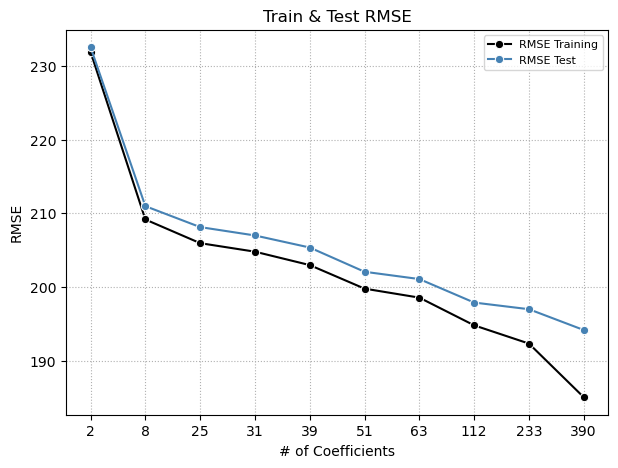

In [574]:
# Plot RMSE vs. Number of Coefficients
plt.figure(figsize=(7,5))
ax = sns.lineplot(
    x = [str(x) for x in df_rmse_levels['nvars2']],  # Convert to string for better x-axis labels
    y = df_rmse_levels['value'], 
    hue = df_rmse_levels['var'], marker='o',
    palette=['k', 'steelblue']
)

# Customize graph appearance
ax.set_title('Train & Test RMSE')
ax.set_ylabel('RMSE')
ax.set_xlabel('# of Coefficients')
ax.legend(fontsize=8, title=None)
ax.grid(linestyle=':')

# Show the plot
plt.show()

**You see after model 9 that noise starts increasing. The RMSE of the training model goes down significantly, while RMSE of test model only goes down slightly. This indicates noise**

**Model 10 of the OLS has the lowest RMSE and will therefore be noted**

In [576]:
# RMSE for OLS Model 10
rmse_ols10 = 185.080515  # Replace with the exact value from your data
rmse_ols10

185.080515

## LASSO

*AI was used during this model*

In [579]:
y, X = patsy.dmatrices("price " + modellev10, df_LAQ3)

In [580]:
X.shape

(36912, 566)

In [581]:
%%time

# Define model
model = Lasso()

# Define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=20250301)

# Define alpha grid
grid = {"alpha": np.arange(0.05, 1, 0.05)}

# Define GridSearchCV
search = GridSearchCV(model, grid, scoring="neg_root_mean_squared_error", cv=cv, verbose=0)

# Perform the search
results = search.fit(X, y)

# Get the best alpha
best_alpha = results.best_estimator_.alpha
print(f"Best Alpha: {best_alpha}")


Best Alpha: 0.05
CPU times: total: 16min 57s
Wall time: 11min 3s


In [582]:
%%time

# Define model
model = Lasso()

# Define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=20250301)

# Define alpha grid
grid = {"alpha": np.arange(0.01, 0.1, 0.01)}

# Define GridSearchCV
search = GridSearchCV(model, grid, scoring="neg_root_mean_squared_error", cv=cv, verbose=0)

# Perform the search
results = search.fit(X, y)

# Get the best alpha
best_alpha = results.best_estimator_.alpha
print(f"Best Alpha: {best_alpha}")


Best Alpha: 0.04
CPU times: total: 10min 24s
Wall time: 6min 25s


**We find that the absolute best Alpha is at 0.04**

In [628]:
# Train LASSO with best alpha
final_lasso = Lasso(alpha=0.04)
final_lasso.fit(X, y)

# Predict using LASSO
y_pred_lasso = final_lasso.predict(X)

# Compute RMSE for LASSO
from sklearn.metrics import mean_squared_error
rmse_lasso = mean_squared_error(y, y_pred_lasso, squared=False)
rmse_lasso

186.20955886159305

In [629]:
# Count the number of features with non-zero coefficients
num_features_used = np.sum(final_lasso.coef_ != 0)

# Print the result
print(f"Number of features used in LASSO: {num_features_used}")


Number of features used in LASSO: 312


In [630]:
rmse_lasso

186.20955886159305

**Above is the RMSE for the LASSO method**

## Random Forest

*AI was used during this model*

In [631]:
df_LAQ3_train, df_LAQ3_holdout = train_test_split(df_LAQ3, train_size=0.7, random_state=20250301)
df_LAQ3_train.shape, df_LAQ3_holdout.shape

((25838, 120), (11074, 120))

In [632]:
y, X = dmatrices("price " + modellev10, df_LAQ3_train)

In [633]:
print('The theoretical recommended number of variables: {:.2f}.'.format(math.sqrt(len(X.design_info.column_names))))

The theoretical recommended number of variables: 23.79.


In [634]:
rfr = RandomForestRegressor(random_state = 20250301)

In [635]:
tune_grid = {"max_features": [20, 24, 28, 32], "min_samples_leaf": [5, 10, 15]}

In [636]:
rf_random = GridSearchCV(
    estimator = rfr,
    param_grid = tune_grid,
    cv = 5,
    scoring = "neg_root_mean_squared_error",
    verbose = 0,
)

In [640]:
%%time
rf_model = rf_random.fit(X, y.ravel())

CPU times: total: 4min 58s
Wall time: 6min 21s


In [647]:
rf_model.cv_results_

{'mean_fit_time': array([5.34171572, 4.80763092, 4.39442158, 6.15443892, 5.33815708,
        5.07408767, 7.15468817, 6.34539466, 5.80843711, 8.10847836,
        7.03084364, 6.58885694]),
 'std_fit_time': array([0.21482986, 0.39659064, 0.14523033, 0.33223558, 0.41674439,
        0.18781602, 0.27467776, 0.32183089, 0.35854072, 0.30203553,
        0.14264304, 0.15391811]),
 'mean_score_time': array([0.18241553, 0.22057958, 0.14051051, 0.16427231, 0.16951404,
        0.14974079, 0.16258287, 0.15661397, 0.13491597, 0.17546091,
        0.16673737, 0.14941797]),
 'std_score_time': array([0.0214855 , 0.13904197, 0.0100774 , 0.01071258, 0.02010165,
        0.01801617, 0.01264255, 0.01713182, 0.01415083, 0.01017272,
        0.02042028, 0.01588377]),
 'param_max_features': masked_array(data=[20, 20, 20, 24, 24, 24, 28, 28, 28, 32, 32, 32],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
          

In [648]:
df_rf_model_cv_results = pd.DataFrame(rf_model.cv_results_)[[
    'param_max_features', 'param_min_samples_leaf', 'mean_test_score']]

In [649]:
df_rf_model_cv_results.columns = ['max features', 'min node size', 'RMSE']

In [650]:
df_rf_model_cv_results

,max features,min node size,RMSE
0,20,5,-181.058606
1,20,10,-185.466974
2,20,15,-188.149174
3,24,5,-179.397356
4,24,10,-183.286746
5,24,15,-185.963225
6,28,5,-177.706172
7,28,10,-181.839229
8,28,15,-183.881921
9,32,5,-176.812751


In [651]:
df_rf_model_cv_results.pivot(
    index = 'max features', 
    columns = 'min node size', 
    values = 'RMSE').round(2)*-1

min node size,5,10,15
max features,,,
20,181.06,185.47,188.15
24,179.40,183.29,185.96
28,177.71,181.84,183.88
32,176.81,180.26,183.03


In [652]:
rf_model.best_score_

-176.81275143858608

In [653]:
rf_model.best_params_

{'max_features': 32, 'min_samples_leaf': 5}

In [654]:
rf_model.best_estimator_

RandomForestRegressor(max_features=32, min_samples_leaf=5,
                      random_state=20250301)

In [655]:
# Convert holdout dataset into design matrices
y_h, X_h = dmatrices("price " + modellev10, df_LAQ3_holdout)

# Make predictions using the trained Random Forest model
pred = rf_model.predict(X_h)

In [656]:
rmse(y_h, pred)

array([294.93217094, 291.3469606 , 275.96725423, ..., 279.01547991,
       291.31664163, 357.63889103])

In [657]:
rf_rmse = mean_squared_error(y_h, pred, squared= False)
rf_rmse

166.1752670477866

**The RMSE above is the RMSE we will use for our comparison. It is the RMSE we found by applying the model trained on the train set to the holdout set.**

**Below I'll look at the variable importance of this model:**

In [660]:
rf_model.best_estimator_.feature_importances_

array([0.00000000e+00, 2.02868598e-02, 1.02726908e-02, 3.17137048e-02,
       8.93765296e-02, 2.27285583e-03, 4.74519334e-05, 5.28096209e-04,
       1.70368313e-04, 4.01642889e-03, 3.23329301e-03, 1.40864021e-03,
       3.86959967e-03, 1.19208249e-03, 2.72033475e-03, 1.02314570e-03,
       3.38311450e-03, 5.63008842e-04, 1.97060432e-03, 5.96130587e-04,
       1.97814137e-03, 1.22113883e-03, 9.37409139e-03, 3.74898012e-04,
       2.44664272e-03, 9.44169964e-04, 8.97339590e-03, 1.23034874e-03,
       3.49883239e-03, 4.62919019e-03, 8.64462140e-03, 7.88451283e-04,
       3.03503657e-04, 9.97015937e-03, 4.94588233e-03, 3.28858305e-03,
       1.23834793e-03, 2.83123094e-05, 1.00337998e-02, 7.95208651e-03,
       6.70837220e-03, 5.79564222e-03, 3.86736073e-02, 1.26257990e-02,
       4.14159868e-02, 8.43384371e-02, 7.28036437e-03, 8.29735313e-03,
       8.98277884e-03, 5.52795722e-03, 7.91496315e-03, 4.24688834e-03,
       3.86753627e-03, 4.43606726e-03, 1.17254122e-02, 2.07954735e-04,
      

In [661]:
pd.DataFrame(
    rf_model.best_estimator_.feature_importances_, 
    X.design_info.column_names)

,0
Intercept,0.000000e+00
accommodates,2.028686e-02
beds,1.027269e-02
bedrooms,3.171370e-02
bathrooms,8.937653e-02
...,...
accommodates:room_Shared_room:amenity_Outdoor_furniture,6.715898e-09
accommodates:room_Shared_room:amenity_Pets_allowed,3.742652e-07
accommodates:room_Shared_room:amenity_Room_darkening_shades,0.000000e+00
accommodates:room_Shared_room:amenity_Dryer,7.561709e-06


In [662]:
df_var_imp = pd.DataFrame(
    rf_model.best_estimator_.feature_importances_, 
    X.design_info.column_names)\
    .reset_index()\
    .rename({"index": "variable", 0: "imp"}, axis=1)\
    .sort_values(by=["imp"], ascending=False)\
    .reset_index(drop = True)

df_var_imp['cumulative_imp'] = df_var_imp['imp'].cumsum()

In [663]:
df_var_imp.style.format({
    'imp': lambda x: f'{x:,.1%}',
    'cumulative_imp': lambda x: f'{x:,.1%}'})

,variable,imp,cumulative_imp
0,bathrooms,8.9%,8.9%
1,bathrooms2,8.4%,17.4%
2,bedrooms2,4.1%,21.5%
3,accommodates2,3.9%,25.4%
4,bedrooms,3.2%,28.6%
5,accommodates:amenity_Wifi,2.6%,31.1%
6,accommodates,2.0%,33.2%
7,accommodates:room_Entire_home_apt:amenity_Wifi,1.7%,34.8%
8,accommodates:amenity_Carbon_monoxide_alarm,1.6%,36.5%
9,accommodates:room_Entire_home_apt:amenity_Smoke_alarm,1.5%,38.0%


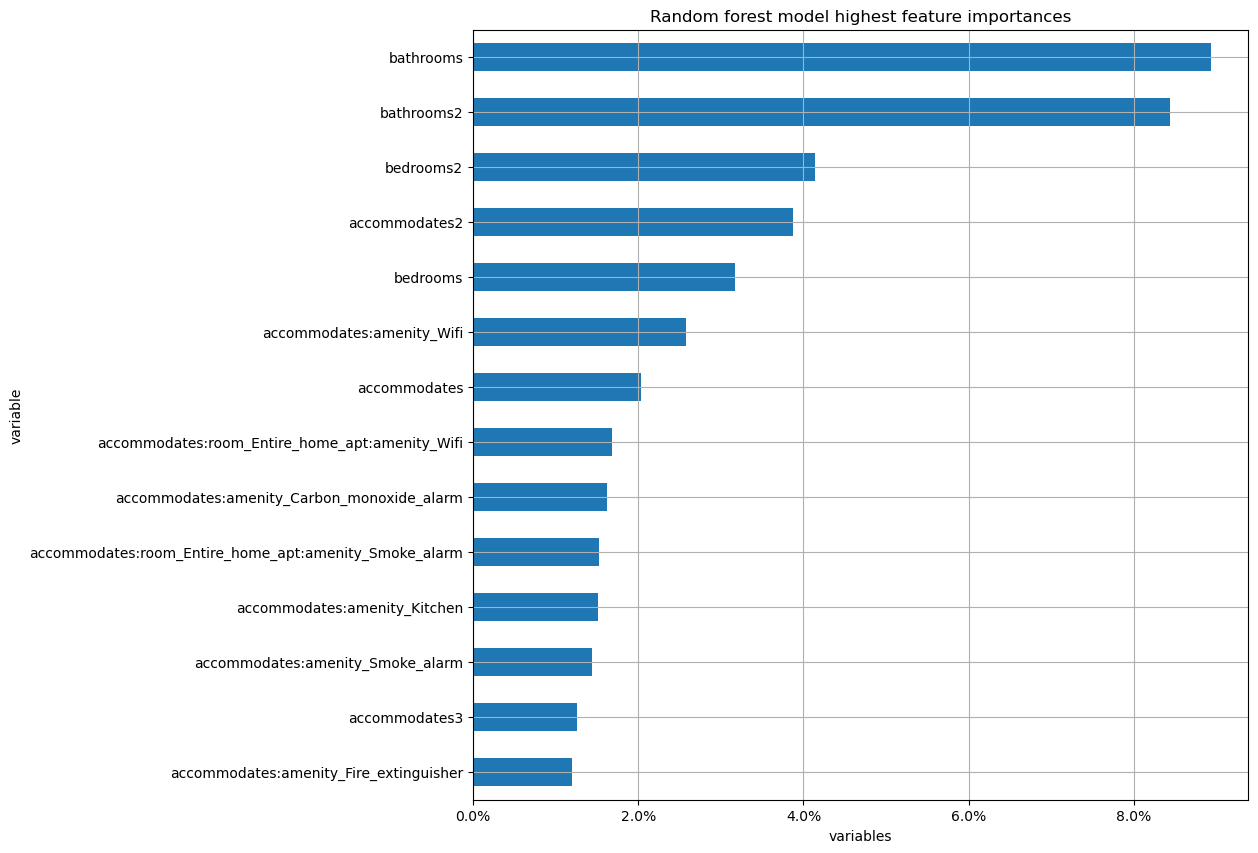

In [664]:
cutoff = 0.012
ax = df_var_imp[df_var_imp.imp > cutoff]\
    .sort_values(by = 'imp')\
    .plot(kind = 'barh',
          x = 'variable', 
          y = 'imp',
          figsize = (10,10), 
          grid = True,
          title = 'Random forest model highest feature importances',
          xlabel = 'variables', 
          legend = False)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

**The graph above shows the relative importance of each column in the model. Bathrooms, Bedrooms, and accommodates seem to be the most important.**

## GBM

*AI used during the model*

In [701]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Define target variable (y) and features (X) based on modellev10
y = df_LAQ3["price"]

# Construct feature list from modellev10 components
feature_columns = (
    list(basic_lev) +
    list(reviews) +
    list(host) +
    list(availability) +
    list(poly_lev) +
    list(X1) +
    list(X2) +
    list(X3) +
    list(amenities)
)

# Handling X4 and X5 (interaction terms)
X4_features = [X4]
X5_features = [X5]

# Combine all features
feature_columns += X4_features + X5_features

# Ensure only available columns are used
feature_columns = [col for col in feature_columns if col in df_LAQ3.columns]

# Define X (features matrix)
X = df_LAQ3[feature_columns]

# Split data into training (70%) and holdout (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20250301)

# Initialize GBM models with different n_estimators
gbm_models = {
    "GBM_200": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=20250301),
    "GBM_400": GradientBoostingRegressor(n_estimators=400, learning_rate=0.1, random_state=20250301),
}

# Dictionary to store RMSE results
rmse_results = {}

# Train models and compute RMSE
for name, model in gbm_models.items():
    # Cross-validation (5-fold CV with 80-20 split)
    cv_rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")).mean()

    # Train on full training set and evaluate on holdout set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    holdout_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store results
    rmse_results[name] = {"CV_RMSE": cv_rmse, "Holdout_RMSE": holdout_rmse}

# Convert results to DataFrame and print
rmse_df = pd.DataFrame.from_dict(rmse_results, orient="index")
print("\nGBM RMSE Results:\n", rmse_df)



GBM RMSE Results:
             CV_RMSE  Holdout_RMSE
GBM_200  170.162146    161.155617
GBM_400  167.503040    159.872539


**We can see that using 400 estimators instead of 200 improves the model. Therefore, we will take the RMSE that was found using 400 estimators for our model comparison**

In [702]:
# Extract the CV_RMSE value for GBM_400
gbm_rmse = rmse_df.loc["GBM_400", "CV_RMSE"]
gbm_rmse

167.50304020118872

In [703]:
gbm_model = GradientBoostingRegressor(n_estimators=400, learning_rate=0.1, random_state=20250301)
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=400, random_state=20250301)

## MLP Neural Network

*AI used during the model*

In [704]:
from sklearn.neural_network import MLPRegressor

# Initialize and train MLP Neural Network
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1500, random_state=20250301)
mlp_model.fit(X_train, y_train)

# Predictions & RMSE
y_pred_mlp = mlp_model.predict(X_test)
mlp_rmse = np.sqrt(mean_squared_error(y_test, y_pred_mlp))

print("MLP Neural Network RMSE:", mlp_rmse)


MLP Neural Network RMSE: 196.9194620379567


In [705]:
mlp_rmse

196.9194620379567

**The number above is the RMSE for the MLP Neural Network**

# Horserace table

In [706]:
pd.DataFrame({'model': ['OLS', 'LASSO', 'random forest', 'GBM', 'MLP'],
              'CV RMSE': [rmse_ols10, rmse_lasso, rf_rmse, gbm_rmse, mlp_rmse]})

,model,CV RMSE
0,OLS,185.080515
1,LASSO,186.209559
2,random forest,166.175267
3,GBM,167.503040
4,MLP,196.919462


## Horserace table Discussion

In this horserace table I compared the Cross-Validation Root-Mean-Squared-Errors of 5 different prediction models. The lower the RMSE, the better the predictability of the model.

#### The best performing model is the Random Forest model
- It has an RMSE of 166.175, which means that it gives the most accurate predictions. 
- Its RMSE far outperforms that of OLS and LASSO, which indicates that these models are likely too simple and that there is a non-linear relationship and colinearity.
- Random Forests generally perform well when capturing complicated patterns and relationships between variables.

#### GBM also performed well
- The Gradient Boosting Model (GBM) had an RMSE of 167.503 which is only slightly higher than the Random Forest
- Similar to Random Forest, GBM also uses decision trees for it's models. But for Random Forest all trees grow independently, while for GBM trees grow after each other, correcting on the previous one. This way BGM learns from its errors

#### OLS performed better than LASSO
- OLS had an RMSE of 185.081 while LASSO had an RMSE of 186.210
- On the other side, LASSO highly simplified the model and left out many coefficients that were not relevant. Where OLS used a total of 390 coefficients in its model, LASSO only used 97.

#### MLP Neural Network has bad performance
- The MLP model has an RMSE of 196.919 making it far less accurate compared to the Random Forest and GBM.

#### Overall
-  Random Forest is the best performing model, closesely followed by GBM

## Feature importance comparison:

*AI used below*

In [739]:
# Extract feature importance from the GBM model
gbm_importance = gbm_model.feature_importances_

# Create DataFrame for GBM feature importance
df_gbm_imp = pd.DataFrame({
    "variable": X_train.columns,
    "GBM_imp": gbm_importance
}).rename({"index": "variable", 0: "imp"}, axis=1).sort_values(by="GBM_imp", ascending=False).reset_index(drop = True)

df_gbm_imp['Cumulative_imp'] = df_gbm_imp['GBM_imp'].cumsum()

df_gbm_imp.style.format({
    'GBM_imp': lambda x: f'{x:,.1%}',
    'Cumulative_imp': lambda x: f'{x:,.1%}'})

,variable,GBM_imp,Cumulative_imp
0,bathrooms,28.1%,28.1%
1,bathrooms2,26.9%,54.9%
2,bedrooms,10.2%,65.1%
3,bedrooms2,4.1%,69.2%
4,host_listings_count,3.3%,72.5%
5,room_Entire_home_apt,2.7%,75.2%
6,review_scores_location,2.4%,77.6%
7,accommodates,2.1%,79.8%
8,availability_30,1.6%,81.4%
9,amenity_BBQ_grill,1.6%,83.0%


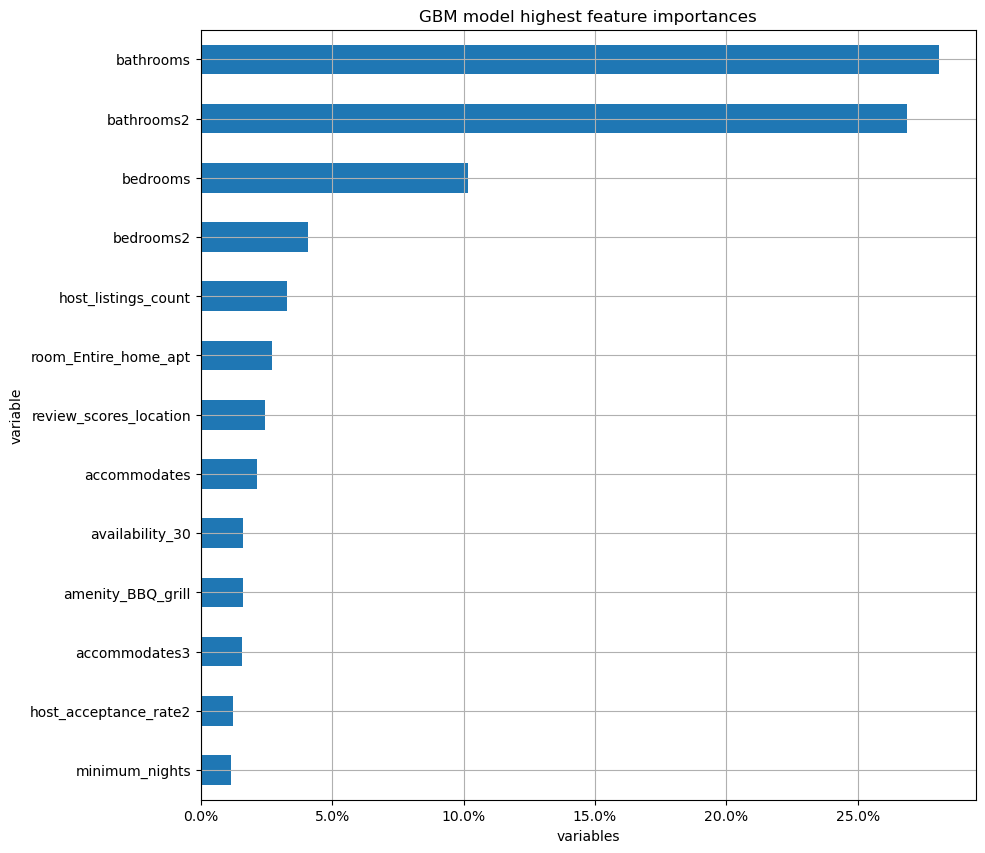

In [741]:
cutoff = 0.011
ax = df_gbm_imp[df_gbm_imp.GBM_imp > cutoff]\
    .sort_values(by = 'GBM_imp')\
    .plot(kind = 'barh',
          x = 'variable', 
          y = 'GBM_imp',
          figsize = (10,10), 
          grid = True,
          title = 'GBM model highest feature importances',
          xlabel = 'variables', 
          legend = False)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

In [742]:
# Ensure both dataframes have the same index structure
df_gbm_imp = df_gbm_imp.reset_index(drop=True)
df_var_imp = df_var_imp.reset_index(drop=True)

# Drop cumulative columns if they exist
df_gbm_imp = df_gbm_imp.drop(columns=['Cumulative_imp'], errors='ignore')
df_var_imp = df_var_imp.drop(columns=['cumulative_imp'], errors='ignore')

# Merge the dataframes side by side
df_merged_imp = pd.concat([df_gbm_imp, df_var_imp], axis=1)

# Keep only the first 10 rows
df_merged_imp = df_merged_imp.head(15)

# Format the output for percentage display
df_merged_imp.style.format({
    'GBM_imp': lambda x: f'{x:,.1%}',
    'imp': lambda x: f'{x:,.1%}'
})

,variable,GBM_imp,variable,imp
0,bathrooms,28.1%,bathrooms,8.9%
1,bathrooms2,26.9%,bathrooms2,8.4%
2,bedrooms,10.2%,bedrooms2,4.1%
3,bedrooms2,4.1%,accommodates2,3.9%
4,host_listings_count,3.3%,bedrooms,3.2%
5,room_Entire_home_apt,2.7%,accommodates:amenity_Wifi,2.6%
6,review_scores_location,2.4%,accommodates,2.0%
7,accommodates,2.1%,accommodates:room_Entire_home_apt:amenity_Wifi,1.7%
8,availability_30,1.6%,accommodates:amenity_Carbon_monoxide_alarm,1.6%
9,amenity_BBQ_grill,1.6%,accommodates:room_Entire_home_apt:amenity_Smoke_alarm,1.5%


## Feature Importance Analysis: Random Forest vs. GBM

In this analysis I will compare and discuss the feature importance rankings for both the Random Forest (RF) and the Gradient Boosting Model (GBM) 

#### GBM Feature Importance (left):
- This model is highly focused with bathrooms having 28.1% and bathrooms2 26.9%. Meaning that bathrooms play the largest role in predicting price for this model.
- After that bedrooms with 10.2% and bedrooms2 with 4.1%. Therefore, bedrooms play the second largest role in the GBM model in predicting prices
- After these important variables the importance quickly drops with host_listings_count in the fifth place having just 3.3% importance

#### Random Forest Feature Importance (right):
- This model is way more evenly distributed with bathrooms having 8.9% and bathrooms2 having 8.4%. Meaning that again bathrooms play the largest role in predicting price for the Random Forest Model as well.
- After that come bedrooms2 with just 4.1% and accommodates2 with 3.9%
- In this model amenities seem to play a way more significant role than in the GBM model

#### Overall:
- It seems that GBM focuses specifically on just a few variables while Random Tree's focus is more spread out

# Validity testing

## Los Angeles, Next Quarter

**For the validity testing we will first test the model we trained on data for Los Angeles during the next quarter.**

**To begin we will replicate the the data wrangling process:**

In [750]:
df_LAQ4 = df_LAQ4_start.copy()

In [751]:
df_LAQ4=df_LAQ4.drop(["calendar_updated", "license", "neighborhood_overview", "neighbourhood", "host_about", "host_location", "first_review", "last_review", "host_neighbourhood", "host_since", "bathrooms_text", "description", "listing_url", "source",
                      "scrape_id", "last_scraped", "host_id", "host_url", "host_thumbnail_url", "host_picture_url", "calendar_last_scraped", "picture_url", "host_name", "host_verifications", "host_has_profile_pic", "name", "neighbourhood_group_cleansed"],axis=1)

In [752]:
# Remove currency symbols and commas, then convert to float
df_LAQ4['price'] = df_LAQ4['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [753]:
df_LAQ4.dropna(subset=['price'], inplace = True)

In [754]:
df_LAQ4=df_LAQ4[df_LAQ4.price<2500]

In [755]:
for var in [
    "review_scores_value", 
    "review_scores_location", 
    "review_scores_checkin", 
    "review_scores_cleanliness", 
    "review_scores_accuracy", 
    "review_scores_communication",
    "review_scores_rating",
    "reviews_per_month"
]:
    df_LAQ4[f"flag_{var}"] = [int(x) for x in df_LAQ4[var].isna()]

In [756]:
for var in [
    "review_scores_value", 
    "review_scores_location", 
    "review_scores_checkin", 
    "review_scores_cleanliness", 
    "review_scores_accuracy", 
    "review_scores_communication",
    "review_scores_rating",
    "reviews_per_month"
]:
    df_LAQ4[var] = df_LAQ4[var].fillna(np.nanmedian(df_LAQ4[var]))

In [757]:
df_LAQ4['beds']=df_LAQ4['beds'].fillna(np.ceil(df_LAQ4['accommodates'] / 2))
df_LAQ4['bedrooms']=df_LAQ4['bedrooms'].fillna(np.ceil(df_LAQ4['accommodates'] / 2))
df_LAQ4['bathrooms']=df_LAQ4['bathrooms'].fillna(np.nanmedian(df_LAQ4['bathrooms']))

In [758]:
# Define ordinal mapping for response times
response_time_mapping = {
    "within an hour": 4,
    "within a few hours": 3,
    "within a day": 2,
    "a few days or more": 1
}

# Apply mapping
df_LAQ4["host_response_time"] = df_LAQ4["host_response_time"].map(response_time_mapping)

# Replace NaN (missing values) with 0 (indicating "no response")
df_LAQ4["host_response_time"].fillna(0, inplace=True)

In [759]:
df_LAQ4['host_response_rate'] = df_LAQ4['host_response_rate'].str.rstrip('%').astype(float) / 100
df_LAQ4['host_acceptance_rate'] = df_LAQ4['host_acceptance_rate'].str.rstrip('%').astype(float) / 100
df_LAQ4['host_response_rate'] = df_LAQ4['host_response_rate'].fillna(0)
df_LAQ4['host_acceptance_rate'] = df_LAQ4['host_acceptance_rate'].fillna(0)
df_LAQ4['host_is_superhost'] = df_LAQ4['host_is_superhost'].map({'t': 1, 'f': 0})
df_LAQ4['host_is_superhost'] = df_LAQ4['host_is_superhost'].fillna(0).astype(int)
df_LAQ4['host_identity_verified'] = df_LAQ4['host_identity_verified'].map({'t': 1, 'f': 0})

In [760]:
df_LAQ4['has_availability'] = df_LAQ4['has_availability'].map({'t': 1, 'f': 0})

df_LAQ4.loc[df_LAQ4['availability_365'] >= 1, 'has_availability'] = 1
df_LAQ4.loc[df_LAQ4['availability_365'] == 0, 'has_availability'] = 0

In [761]:
df_LAQ4=df_LAQ4.drop(["property_type"],axis=1)

In [762]:
# Assuming df_LAQ4 is your DataFrame
df_LAQ4 = pd.get_dummies(df_LAQ4, columns=['room_type'], prefix='room', dtype=int)
df_LAQ4.columns = df_LAQ4.columns.str.replace(" ", "_")
df_LAQ4.columns = df_LAQ4.columns.str.replace("/", "_")

In [763]:
df_LAQ4['instant_bookable'] = df_LAQ4['instant_bookable'].map({'t': 1, 'f': 0})

In [764]:
# Convert 'amenities' column from string representation of lists to actual lists
df_LAQ4['amenities'] = df_LAQ4['amenities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Flatten the list of amenities and count occurrences
all_amenities = df_LAQ4['amenities'].explode().value_counts()

# Select the top 50 most common amenities
top_amenities = all_amenities.head(50).index.tolist()

# Create binary columns for the top amenities
for amenity in top_amenities:
    df_LAQ4[f'amenity_{amenity}'] = df_LAQ4['amenities'].apply(lambda x: 1 if amenity in x else 0)

# Drop the original amenities column
df_LAQ4.drop(columns=['amenities'], inplace=True)

# Print column names before renaming
print("Before renaming:", df_LAQ4.columns.tolist())

# Replace spaces and special characters with underscores in column names
df_LAQ4.columns = df_LAQ4.columns.str.replace(r"[^\w]", "_", regex=True)

# Print column names after renaming
print("After renaming:", df_LAQ4.columns.tolist())

# Fix selection of amenities
amenities = [col for col in df_LAQ4.columns if col.startswith("amenity_")]

Before renaming: ['id', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calcu

In [765]:
df_LAQ4["accommodates2"] = df_LAQ4["accommodates"] ** 2
df_LAQ4["accommodates3"] = df_LAQ4["accommodates"] ** 3
df_LAQ4["bedrooms2"] = df_LAQ4["bedrooms"] ** 2
df_LAQ4["bathrooms2"] = df_LAQ4["bathrooms"] ** 2
df_LAQ4["reviews_per_month2"] = df_LAQ4["reviews_per_month"] ** 2
df_LAQ4["reviews_per_month3"] = df_LAQ4["reviews_per_month"] ** 3
df_LAQ4["host_acceptance_rate2"] = df_LAQ4["host_acceptance_rate"] ** 2
df_LAQ4["host_response_rate2"] = df_LAQ4["host_response_rate"] ** 2
df_LAQ4["availability_365_2"] = df_LAQ4["availability_365"] ** 2
df_LAQ4["availability_90_2"] = df_LAQ4["availability_90"] ** 2
df_LAQ4["number_of_reviews2"] = df_LAQ4["number_of_reviews"] ** 2
df_LAQ4["review_scores_rating2"] = df_LAQ4["review_scores_rating"] ** 2
df_LAQ4["review_scores_rating3"] = df_LAQ4["review_scores_rating"] ** 3

In [766]:
# Set a random seed for reproducibility
np.random.seed(20250301)  # You can change this or keep it consistent

# Define sample size for holdout set (20% of data)
smp_size = round(0.2 * df_LAQ4.shape[0]) - 1  # Adjusted for df_LAQ3

# Perform the train-holdout split
df_work, df_holdout = train_test_split(df_LAQ4, test_size=smp_size)

# Display shapes to confirm correct split
print("Training set shape:", df_work.shape)
print("Holdout set shape:", df_holdout.shape)


Training set shape: (30375, 120)
Holdout set shape: (7593, 120)


In [767]:
# Number of folds for cross-validation
n_folds = 5

# Define K-Fold splitting strategy (no shuffle, as per original code)
k = KFold(n_splits=n_folds, shuffle=False, random_state=None)


In [770]:
df_LAQ4_missing = df_LAQ4.isna().sum()

In [774]:
df_LAQ4_missing[df_LAQ4_missing>0].sort_values(ascending = False)

host_listings_count          7
host_total_listings_count    7
host_identity_verified       7
dtype: int64

**Unfortunately there are still 7 missing values, but since that probably won't affect our prediction significantly, we will just impute them with 0**

In [786]:
df_LAQ4 = df_LAQ4.fillna(0)  # Replace NaNs with 0

In [787]:
df_LAQ4_missing = df_LAQ4.isna().sum()

In [788]:
df_LAQ4_missing[df_LAQ4_missing>0].sort_values(ascending = False)

Series([], dtype: int64)

## OLS

In [789]:
cv_list_LAQ4 = []  # Initialize an empty list to store results

# Iterate through model levels and perform cross-validation
for i in [
    modellev1,
    modellev2,
    modellev3,
    modellev4,
    modellev5,
    modellev6,
    modellev7,
    modellev8,
    modellev9,
    modellev10
]:
    # Run cross-validation on df_LAQ4
    cv_list_LAQ4 += [cv_reg("price" + i, df_LAQ4, k, df_holdout, "HC0")]

In [790]:
summarize_cv(cv_list_LAQ4).map('{:,.3f}'.format)

,Model1,Model2,Model3,Model4,Model5,Model6,Model7,Model8,Model9,Model10
Fold1,230.036,204.030,201.012,199.735,197.968,194.444,193.015,188.758,186.214,178.884
Fold2,225.261,203.949,200.629,199.169,197.324,193.674,192.135,188.473,185.433,177.671
Fold3,224.524,204.544,201.498,199.914,198.063,194.370,192.827,189.008,186.006,179.207
Fold4,226.868,203.313,199.698,198.414,196.662,195.574,194.542,190.996,188.598,181.963
Fold5,225.139,204.466,200.136,199.138,197.572,193.539,192.006,188.739,185.827,177.975
Average,226.366,204.060,200.595,199.274,197.518,194.320,192.905,189.195,186.416,179.140


In [791]:
LAQ4_rmse_ols10 = 179.140  # Replace with the exact value from your data
LAQ4_rmse_ols10

179.14

**Above is the RMSE we found testing our OLS prediction model to this dataset**

## LASSO

In [795]:
y_LAQ4, X_LAQ4 = patsy.dmatrices("price " + modellev10, df_LAQ4)

In [796]:
X_LAQ4.shape

(37968, 566)

**We will apply an alpha of 0.04 again just like before**

In [798]:
# Train LASSO with best alpha
LAQ4_final_lasso = Lasso(alpha=0.04)
LAQ4_final_lasso.fit(X_LAQ4, y_LAQ4)

# Predict using LASSO
y_pred_lasso_LAQ4 = LAQ4_final_lasso.predict(X_LAQ4)

# Compute RMSE for LASSO
from sklearn.metrics import mean_squared_error
LAQ4_rmse_lasso = mean_squared_error(y_LAQ4, y_pred_lasso_LAQ4, squared=False)
LAQ4_rmse_lasso

180.42456153087468

In [799]:
# Count the number of features with non-zero coefficients
num_features_used_LAQ4 = np.sum(LAQ4_final_lasso.coef_ != 0)

# Print the result
print(f"Number of features used in LASSO: {num_features_used_LAQ4}")


Number of features used in LASSO: 313


In [800]:
LAQ4_rmse_lasso

180.42456153087468

**Above is the RMSE we found testing our LASSO prediction model to this dataset**

## Random forest

In [845]:
df_LAQ4_train, df_LAQ4_holdout = train_test_split(df_LAQ4, train_size=0.7, random_state=20250301)
df_LAQ4_train.shape, df_LAQ4_holdout.shape

((26577, 120), (11391, 120))

In [852]:
# Convert holdout dataset into design matrices
LAQ4_y_h, LAQ4_X_h = dmatrices("price " + modellev10, df_LAQ4_holdout)

# Make predictions using the trained Random Forest model
pred_LAQ4 = rf_model.predict(LAQ4_X_h)

In [856]:
LAQ4_rf_rmse = mean_squared_error(LAQ4_y_h, pred_LAQ4, squared= False)
LAQ4_rf_rmse

156.42900311132976

**Above is the RMSE we found testing our Random Forest prediction model to this dataset**

## GBM model

In [838]:
# Define target variable (y) and features (X) based on modellev10
y = df_LAQ4["price"]

# Construct feature list from modellev10 components
feature_columns = (
    list(basic_lev) +
    list(reviews) +
    list(host) +
    list(availability) +
    list(poly_lev) +
    list(X1) +
    list(X2) +
    list(X3) +
    list(amenities)
)

# Handling X4 and X5 (interaction terms)
X4_features = [X4]
X5_features = [X5]

# Combine all features
feature_columns += X4_features + X5_features

# Ensure only available columns are used
feature_columns = [col for col in feature_columns if col in df_LAQ4.columns]

# Define X (features matrix)
X = df_LAQ4[feature_columns]

# Split data into training (70%) and holdout (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20250301)

# Initialize GBM models with different n_estimators
gbm_models = {
    "GBM_200": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=20250301),
    "GBM_400": GradientBoostingRegressor(n_estimators=400, learning_rate=0.1, random_state=20250301),
}

# Dictionary to store RMSE results
rmse_results = {}

# Train models and compute RMSE
for name, model in gbm_models.items():
    # Cross-validation (5-fold CV with 80-20 split)
    cv_rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")).mean()

    # Train on full training set and evaluate on holdout set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    holdout_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store results
    rmse_results[name] = {"CV_RMSE": cv_rmse, "Holdout_RMSE": holdout_rmse}

# Convert results to DataFrame and print
LAQ4_rmse_df = pd.DataFrame.from_dict(rmse_results, orient="index")
print("\nGBM RMSE Results:\n", LAQ4_rmse_df)



GBM RMSE Results:
             CV_RMSE  Holdout_RMSE
GBM_200  162.373696    162.519358
GBM_400  159.664078    159.184655


In [839]:
# Extract the CV_RMSE value for GBM_400
LAQ4_gbm_rmse = LAQ4_rmse_df.loc["GBM_400", "CV_RMSE"]
LAQ4_gbm_rmse

159.66407827304027

**Above is the RMSE we found testing our GBM prediction model to this dataset**

## MLP Neural Network

In [843]:
# Initialize and train MLP Neural Network
LAQ4_mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1500, random_state=20250301)
LAQ4_mlp_model.fit(X_train, y_train)

# Predictions & RMSE
LAQ4_y_pred_mlp = LAQ4_mlp_model.predict(X_test)
LAQ4_mlp_rmse = np.sqrt(mean_squared_error(y_test, LAQ4_y_pred_mlp))

print("MLP Neural Network RMSE:", LAQ4_mlp_rmse)


MLP Neural Network RMSE: 221.58131967692333


In [844]:
LAQ4_mlp_rmse

221.58131967692333

**Above is the RMSE we found testing our MLP prediction model to this dataset**

## San Francisco

**Now we will go on to the dataset for quarter 3 but testing on San Francisco. We will do the exact same thing as we just did, but now for the San Francisco dataset**

In [971]:
df_SFQ3 = df_SFQ3_start.copy()

In [972]:
df_SFQ3=df_SFQ3.drop(["calendar_updated", "license", "neighborhood_overview", "neighbourhood", "host_about", "host_location", "first_review", "last_review", "host_neighbourhood", "host_since", "bathrooms_text", "description", "listing_url", "source",
                      "scrape_id", "last_scraped", "host_id", "host_url", "host_thumbnail_url", "host_picture_url", "calendar_last_scraped", "picture_url", "host_name", "host_verifications", "host_has_profile_pic", "name", "neighbourhood_group_cleansed"],axis=1)

In [973]:
# Remove currency symbols and commas, then convert to float
df_SFQ3['price'] = df_SFQ3['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [974]:
df_SFQ3.dropna(subset=['price'], inplace = True)

In [977]:
df_SFQ3=df_SFQ3[df_SFQ3.price<2500]

In [978]:
for var in [
    "review_scores_value", 
    "review_scores_location", 
    "review_scores_checkin", 
    "review_scores_cleanliness", 
    "review_scores_accuracy", 
    "review_scores_communication",
    "review_scores_rating",
    "reviews_per_month"
]:
    df_SFQ3[f"flag_{var}"] = [int(x) for x in df_SFQ3[var].isna()]

In [979]:
for var in [
    "review_scores_value", 
    "review_scores_location", 
    "review_scores_checkin", 
    "review_scores_cleanliness", 
    "review_scores_accuracy", 
    "review_scores_communication",
    "review_scores_rating",
    "reviews_per_month"
]:
    df_SFQ3[var] = df_SFQ3[var].fillna(np.nanmedian(df_SFQ3[var]))

In [980]:
df_SFQ3['beds']=df_SFQ3['beds'].fillna(np.ceil(df_SFQ3['accommodates'] / 2))
df_SFQ3['bedrooms']=df_SFQ3['bedrooms'].fillna(np.ceil(df_SFQ3['accommodates'] / 2))
df_SFQ3['bathrooms']=df_SFQ3['bathrooms'].fillna(np.nanmedian(df_SFQ3['bathrooms']))

In [987]:
# Define ordinal mapping for response times
response_time_mapping = {
    "within an hour": 4,
    "within a few hours": 3,
    "within a day": 2,
    "a few days or more": 1
}

# Apply mapping
df_SFQ3["host_response_time"] = df_SFQ3["host_response_time"].map(response_time_mapping)

# Replace NaN (missing values) with 0 (indicating "no response")
df_SFQ3["host_response_time"].fillna(0, inplace=True)

In [988]:
df_SFQ3['host_response_rate'] = df_SFQ3['host_response_rate'].str.rstrip('%').astype(float) / 100
df_SFQ3['host_acceptance_rate'] = df_SFQ3['host_acceptance_rate'].str.rstrip('%').astype(float) / 100
df_SFQ3['host_response_rate'] = df_SFQ3['host_response_rate'].fillna(0)
df_SFQ3['host_acceptance_rate'] = df_SFQ3['host_acceptance_rate'].fillna(0)
df_SFQ3['host_is_superhost'] = df_SFQ3['host_is_superhost'].map({'t': 1, 'f': 0})
df_SFQ3['host_is_superhost'] = df_SFQ3['host_is_superhost'].fillna(0).astype(int)
df_SFQ3['host_identity_verified'] = df_SFQ3['host_identity_verified'].map({'t': 1, 'f': 0})

In [989]:
df_SFQ3['has_availability'] = df_SFQ3['has_availability'].map({'t': 1, 'f': 0})

df_SFQ3.loc[df_SFQ3['availability_365'] >= 1, 'has_availability'] = 1
df_SFQ3.loc[df_SFQ3['availability_365'] == 0, 'has_availability'] = 0

In [990]:
df_SFQ3=df_SFQ3.drop(["property_type"],axis=1)

In [991]:
# Assuming df_LAQ4 is your DataFrame
df_SFQ3 = pd.get_dummies(df_SFQ3, columns=['room_type'], prefix='room', dtype=int)
df_SFQ3.columns = df_SFQ3.columns.str.replace(" ", "_")
df_SFQ3.columns = df_SFQ3.columns.str.replace("/", "_")

In [992]:
df_SFQ3['instant_bookable'] = df_SFQ3['instant_bookable'].map({'t': 1, 'f': 0})

In [993]:
import ast
import pandas as pd

# Define the exact list of amenities from LAQ3
laq3_amenities = [
    "amenity_Smoke_alarm", "amenity_Wifi", "amenity_Kitchen", "amenity_Carbon_monoxide_alarm",
    "amenity_Hot_water", "amenity_Essentials", "amenity_Hangers", "amenity_Hair_dryer",
    "amenity_Dishes_and_silverware", "amenity_Cooking_basics", "amenity_Iron", "amenity_Microwave",
    "amenity_Bed_linens", "amenity_Refrigerator", "amenity_Shampoo", "amenity_Dedicated_workspace",
    "amenity_Fire_extinguisher", "amenity_Self_check_in", "amenity_Air_conditioning",
    "amenity_Free_parking_on_premises", "amenity_First_aid_kit", "amenity_TV", "amenity_Heating",
    "amenity_Long_term_stays_allowed", "amenity_Free_street_parking", "amenity_Extra_pillows_and_blankets",
    "amenity_Washer", "amenity_Dining_table", "amenity_Private_entrance", "amenity_Cleaning_products",
    "amenity_Exterior_security_cameras_on_property", "amenity_Freezer", "amenity_Dishwasher",
    "amenity_Oven", "amenity_Toaster", "amenity_Coffee_maker", "amenity_Bathtub", "amenity_Shower_gel",
    "amenity_Hot_water_kettle", "amenity_Body_soap", "amenity_Wine_glasses", "amenity_Conditioner",
    "amenity_Stove", "amenity_Outdoor_dining_area", "amenity_Coffee", "amenity_Outdoor_furniture",
    "amenity_Pets_allowed", "amenity_Room_darkening_shades", "amenity_Dryer", "amenity_BBQ_grill"
]

# Convert 'amenities' column from string representation of lists to actual lists
df_SFQ3["amenities"] = df_SFQ3["amenities"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Create binary columns for the predefined LAQ3 amenities
for amenity in laq3_amenities:
    df_SFQ3[amenity] = df_SFQ3["amenities"].apply(lambda x: 1 if amenity in x else 0)

# Drop the original 'amenities' column
df_SFQ3.drop(columns=["amenities"], inplace=True)

In [1001]:
df_SFQ3["accommodates2"] = df_SFQ3["accommodates"] ** 2
df_SFQ3["accommodates3"] = df_SFQ3["accommodates"] ** 3
df_SFQ3["bedrooms2"] = df_SFQ3["bedrooms"] ** 2
df_SFQ3["bathrooms2"] = df_SFQ3["bathrooms"] ** 2
df_SFQ3["reviews_per_month2"] = df_SFQ3["reviews_per_month"] ** 2
df_SFQ3["reviews_per_month3"] = df_SFQ3["reviews_per_month"] ** 3
df_SFQ3["host_acceptance_rate2"] = df_SFQ3["host_acceptance_rate"] ** 2
df_SFQ3["host_response_rate2"] = df_SFQ3["host_response_rate"] ** 2
df_SFQ3["availability_365_2"] = df_SFQ3["availability_365"] ** 2
df_SFQ3["availability_90_2"] = df_SFQ3["availability_90"] ** 2
df_SFQ3["number_of_reviews2"] = df_SFQ3["number_of_reviews"] ** 2
df_SFQ3["review_scores_rating2"] = df_SFQ3["review_scores_rating"] ** 2
df_SFQ3["review_scores_rating3"] = df_SFQ3["review_scores_rating"] ** 3

In [1002]:
# Set a random seed for reproducibility
np.random.seed(20250301)  # You can change this or keep it consistent

# Define sample size for holdout set (20% of data)
smp_size = round(0.2 * df_SFQ3.shape[0]) - 1  # Adjusted for df_SFQ3

# Perform the train-holdout split
df_work, df_holdout = train_test_split(df_SFQ3, test_size=smp_size)

# Display shapes to confirm correct split
print("Training set shape:", df_work.shape)
print("Holdout set shape:", df_holdout.shape)


Training set shape: (4907, 120)
Holdout set shape: (1225, 120)


In [1003]:
# Number of folds for cross-validation
n_folds = 5

# Define K-Fold splitting strategy (no shuffle, as per original code)
k = KFold(n_splits=n_folds, shuffle=False, random_state=None)


In [1004]:
df_SFQ3_missing = df_SFQ3.isna().sum()

In [1009]:
df_SFQ3_missing[df_SFQ3_missing>0].sort_values(ascending = False)

Series([], dtype: int64)

In [1010]:
df_SFQ3 = df_SFQ3.fillna(0)  # Replace NaNs with 0

In [1011]:
df_SFQ3_missing = df_SFQ3.isna().sum()

In [1012]:
df_SFQ3_missing[df_SFQ3_missing>0].sort_values(ascending = False)

Series([], dtype: int64)

## OLS

In [1015]:
cv_list_SFQ3 = []  # Initialize an empty list to store results

# Iterate through model levels and perform cross-validation
for i in [
    modellev1,
    modellev2,
    modellev3,
    modellev4,
    modellev5,
    modellev6,
    modellev7,
    modellev8,
    modellev9,
    modellev10
]:
    # Run cross-validation on df_SFQ3
    cv_list_SFQ3 += [cv_reg("price" + i, df_SFQ3, k, df_holdout, "HC0")]

In [1020]:
summarize_cv(cv_list_SFQ3).map('{:,.3f}'.format)

,Model1,Model2,Model3,Model4,Model5,Model6,Model7,Model8,Model9,Model10
Fold1,168.529,160.877,155.890,154.158,152.469,150.937,150.659,150.659,150.659,150.659
Fold2,166.360,161.052,157.419,157.121,153.869,150.313,149.956,149.956,149.956,149.956
Fold3,166.304,161.228,157.654,156.596,153.536,150.212,149.908,149.908,149.908,149.908
Fold4,156.650,151.733,148.432,147.163,144.670,141.900,141.787,141.787,141.787,141.787
Fold5,141.476,137.013,134.607,133.134,130.562,127.543,127.212,127.212,127.212,127.212
Average,159.864,154.381,150.800,149.635,147.021,144.181,143.904,143.904,143.904,143.904


In [1053]:
SFQ3_rmse_ols10 = 143.904  # Replace with the exact value from your data
SFQ3_rmse_ols10

143.904

## LASSO

In [1025]:
y_SFQ3, X_SFQ3 = patsy.dmatrices("price " + modellev10, df_SFQ3)

In [1027]:
X_SFQ3.shape

(6132, 566)

In [1029]:
# Train LASSO with best alpha
SFQ3_final_lasso = Lasso(alpha=0.04)
SFQ3_final_lasso.fit(X_SFQ3, y_SFQ3)

# Predict using LASSO
y_pred_lasso_SFQ3 = SFQ3_final_lasso.predict(X_SFQ3)

# Compute RMSE for LASSO
from sklearn.metrics import mean_squared_error
SFQ3_rmse_lasso = mean_squared_error(y_SFQ3, y_pred_lasso_SFQ3, squared=False)
SFQ3_rmse_lasso

145.5001742747544

In [1031]:
# Count the number of features with non-zero coefficients
num_features_used_SFQ3 = np.sum(SFQ3_final_lasso.coef_ != 0)

# Print the result
print(f"Number of features used in LASSO: {num_features_used_SFQ3}")


Number of features used in LASSO: 56


In [1033]:
SFQ3_rmse_lasso

145.5001742747544

## Random forest

In [1035]:
df_SFQ3_train, df_SFQ3_holdout = train_test_split(df_SFQ3, train_size=0.7, random_state=20250301)
df_SFQ3_train.shape, df_SFQ3_holdout.shape

((4292, 120), (1840, 120))

In [1037]:
# Convert holdout dataset into design matrices
SFQ3_y_h, SFQ3_X_h = dmatrices("price " + modellev10, df_SFQ3_holdout)

# Make predictions using the trained Random Forest model
pred_SFQ3 = rf_model.predict(SFQ3_X_h)

In [1041]:
# Train LASSO with best alpha
SFQ3_final_lasso = Lasso(alpha=0.04)
SFQ3_final_lasso.fit(X_SFQ3, y_SFQ3)

# Predict using LASSO
y_pred_lasso_SFQ3 = SFQ3_final_lasso.predict(X_SFQ3)

# Compute RMSE for LASSO
from sklearn.metrics import mean_squared_error
SFQ3_rmse_lasso = mean_squared_error(y_SFQ3, y_pred_lasso_SFQ3, squared=False)
SFQ3_rmse_lasso

145.5001742747544

In [1043]:
rmse(SFQ3_y_h, pred_SFQ3)

array([185.19332444, 179.91321212, 177.77143752, ..., 197.49639102,
       185.17030204, 174.97730115])

In [1045]:
SFQ3_rf_rmse = mean_squared_error(SFQ3_y_h, pred_SFQ3, squared= False)
SFQ3_rf_rmse

144.81210477744682

## GBM model

In [1047]:
# Define target variable (y) and features (X) based on modellev10
y = df_SFQ3["price"]

# Construct feature list from modellev10 components
feature_columns = (
    list(basic_lev) +
    list(reviews) +
    list(host) +
    list(availability) +
    list(poly_lev) +
    list(X1) +
    list(X2) +
    list(X3) +
    list(amenities)
)

# Handling X4 and X5 (interaction terms)
X4_features = [X4]
X5_features = [X5]

# Combine all features
feature_columns += X4_features + X5_features

# Ensure only available columns are used
feature_columns = [col for col in feature_columns if col in df_SFQ3.columns]

# Define X (features matrix)
X = df_SFQ3[feature_columns]

# Define X (features matrix)
X = df_SFQ3[feature_columns]

# Split data into training (70%) and holdout (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20250301)

# Initialize GBM models with different n_estimators
gbm_models = {
    "GBM_200": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=20250301),
    "GBM_400": GradientBoostingRegressor(n_estimators=400, learning_rate=0.1, random_state=20250301),
}

# Dictionary to store RMSE results
rmse_results = {}

# Train models and compute RMSE
for name, model in gbm_models.items():
    # Cross-validation (5-fold CV with 80-20 split)
    cv_rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")).mean()

    # Train on full training set and evaluate on holdout set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    holdout_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store results
    rmse_results[name] = {"CV_RMSE": cv_rmse, "Holdout_RMSE": holdout_rmse}

# Convert results to DataFrame and print
SFQ3_rmse_df = pd.DataFrame.from_dict(rmse_results, orient="index")
print("\nGBM RMSE Results:\n", SFQ3_rmse_df)



GBM RMSE Results:
             CV_RMSE  Holdout_RMSE
GBM_200  132.865828    113.893892
GBM_400  132.267632    112.710937


In [1048]:
# Extract the CV_RMSE value for GBM_400
SFQ3_gbm_rmse = SFQ3_rmse_df.loc["GBM_400", "CV_RMSE"]
SFQ3_gbm_rmse

132.26763184582583

## MLP Neural Network

In [951]:
from sklearn.neural_network import MLPRegressor

# Initialize and train MLP Neural Network
SFQ3_mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1500, random_state=20250301)
SFQ3_mlp_model.fit(X_train, y_train)

# Predictions & RMSE
SFQ3_y_pred_mlp = SFQ3_mlp_model.predict(X_test)
SFQ3_mlp_rmse = np.sqrt(mean_squared_error(y_test, SFQ3_y_pred_mlp))

print("MLP Neural Network RMSE:", SFQ3_mlp_rmse)


MLP Neural Network RMSE: 216.06220964580967


In [952]:
SFQ3_mlp_rmse

216.06220964580967

# External validity

In [1055]:
 pd.DataFrame({
    "Model": ["OLS", "LASSO", "Random Forest", "GBM", "MLP"],
    "LAQ3 RMSE": [rmse_ols10, rmse_lasso, rf_rmse, gbm_rmse, mlp_rmse],
    "LAQ4 RMSE": [LAQ4_rmse_ols10, LAQ4_rmse_lasso, LAQ4_rf_rmse, LAQ4_gbm_rmse, LAQ4_mlp_rmse],
    "SFQ3 RMSE": [SFQ3_rmse_ols10, SFQ3_rmse_lasso, SFQ3_rf_rmse, SFQ3_gbm_rmse, SFQ3_mlp_rmse]
})

,Model,LAQ3 RMSE,LAQ4 RMSE,SFQ3 RMSE
0,OLS,185.080515,179.140000,143.904000
1,LASSO,186.209559,180.424562,145.500174
2,Random Forest,166.175267,156.429003,144.812105
3,GBM,167.503040,159.664078,132.267632
4,MLP,196.919462,221.581320,216.062210


## Analysis

### OLS
- For OLS you can see that the training data did well on the test data. The RMSE of the test data is even lower for the next quarter in Los Angeles and way lower for San Francisco.
- The model performed better for San Francisco than for Los Angeles
- There is no overfitting

### LASSO
- This model overall did slightly worse than the OLS model
- Again you see the same pattern that RMSE decreased in the next quarter and decreased a lot for San Francisco
- Again no overfitting

### Random Forest
- Random Forest significantly outperformed OLS and LASSO
- Again a similar pattern where RMSE decreases for the next quarter and decreases a lot for San Francisco
- This is the most useful model. And slightly better than GBM
- Slight overfitting in this model

### GBM
- This model also did very well, and only slightly worse than Random Forest
- However, for San Francisco the RMSE for this model is lower than for the Random Forest meaning that this model has better external validity to San Francisco.
- No overfitting in this model, this suggests that it balances the training well

### MLP
- This model did worse than any of the other models
- It does not have external validity as the test sets have higher RMSE than the training set
- There is severe overfitting in this model